In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname='/nfs/users/nfs_e/er10/fonts/arial.ttf',
    name='my_arial')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['axes.labelcolor'] = 'k'
mpl.rcParams['xtick.color'] = 'k'
mpl.rcParams['ytick.color'] = 'k'
import seaborn as sns
import pandas as pd
from liftover import get_lifter
from scipy import stats
import scikit_posthocs as sp

%matplotlib inline

In [2]:
data_root='/nfs/users/nfs_e/er10/SGE/DDX3X_paper/Revised/'
out_files='/nfs/users/nfs_e/er10/SGE/DDX3X_paper/Figure_plots/'

In [4]:
df=pd.read_csv(data_root+'Table_S9_SGE_data_for_all_variants_tested_with_annotation.txt', header=0, sep='\t',index_col=False)
not_snvre=df.query('Variant_design_type!="snvre"')

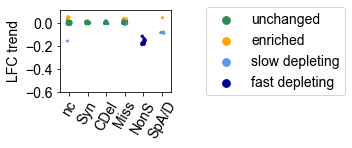

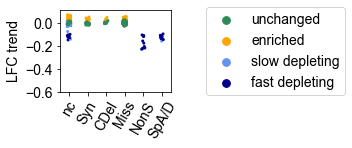

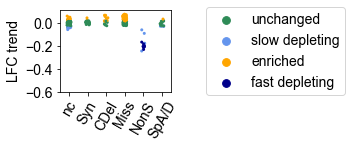

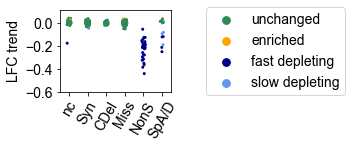

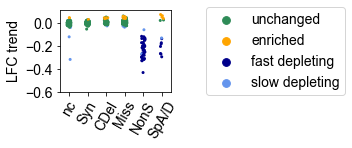

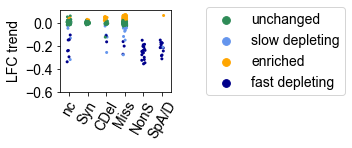

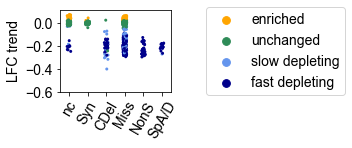

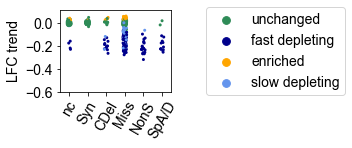

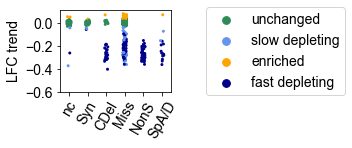

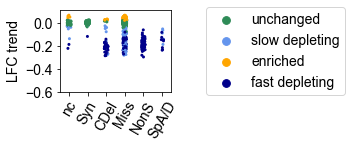

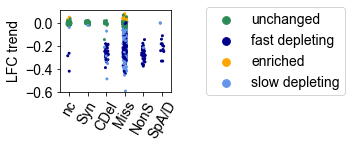

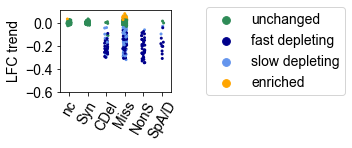

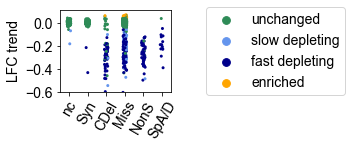

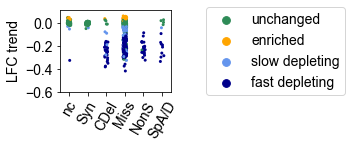

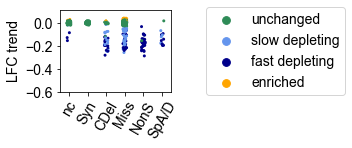

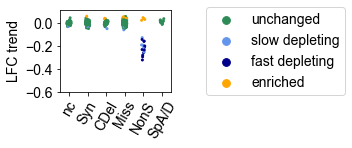

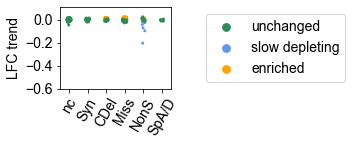

In [5]:
exon1=df.query("SGE_exon_group==1")
exon2=df.query("SGE_exon_group==2")
exon3=df.query("SGE_exon_group==3")
exon4=df.query("SGE_exon_group==4")
exon5=df.query("SGE_exon_group==5")
exon6=df.query("SGE_exon_group==6")
exon7=df.query("SGE_exon_group==7")
exon8=df.query("SGE_exon_group==8")
exon9=df.query("SGE_exon_group==9")
exon10=df.query("SGE_exon_group==10")
exon11=df.query("SGE_exon_group==11")
exon12=df.query("SGE_exon_group==12")
exon13=df.query("SGE_exon_group==13")
exon14=df.query("SGE_exon_group==14")
exon15=df.query("SGE_exon_group==15")
exon16=df.query("SGE_exon_group==16")
exon17=df.query("SGE_exon_group==17")

exons=[(exon1,'1'), (exon2, '2'), (exon3, '3'), (exon4,'4'), (exon5, '5'), (exon6, '6'),(exon7,'7'), (exon8, '8'),(exon9, '9'),(exon10, '10'),(exon11, '11'),(exon12, '12'),(exon13,'13'), (exon14, '14'), (exon15, '15'),
      (exon16,'16'), (exon17, '17')]

for entry in exons:
    exon, label = entry
    color_dict = dict({'fast depleting':'darkblue', 'slow depleting':'cornflowerblue', 'unchanged':'seagreen', 'enriched':'orange'})
    fig, ax = plt.subplots()

    formatter = mpl.ticker.FormatStrFormatter('%d')
    #ax.set_yticks(,fontsize=13)
    ax.set_ylim(-0.6,0.11)
    ax.xaxis.set_major_formatter(formatter)
    fig.set_size_inches(2,1.5)
    g=sns.stripplot(x="Variant_category", y="cLFC_trend", order=['noncoding','synonymous', 'inframe', 'missense', 'nonsense', 'splice A/D'],
                    hue="SGE_functional_classification", palette=color_dict, jitter=True, marker='o', size=3, edgecolor='gray', 
                    data=exon, ax=ax)
    ax.set_xticklabels(['nc', 'Syn', 'CDel', 'Miss', 'NonS', 'SpA/D'], fontsize=14, rotation=60)
    ax.set_xlabel('')
    plt.yticks(fontsize=14)
    plt.ylabel('LFC trend', fontsize=14)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=14)
    plt.savefig(out_files+'/Fig3B_variant_cat_plot_ex'+label+'.pdf', dpi=1300, bbox_inches='tight', transparent=True)
    

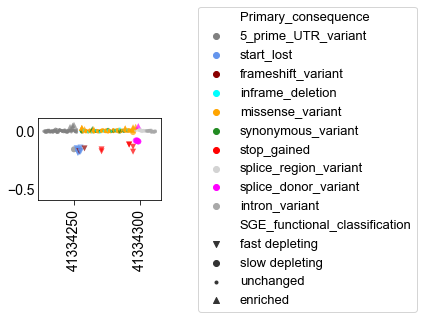

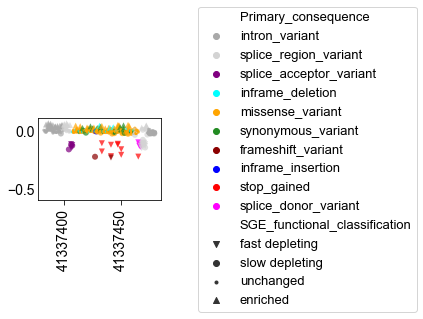

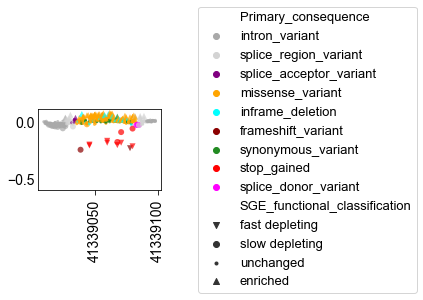

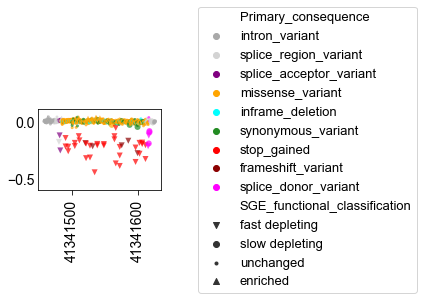

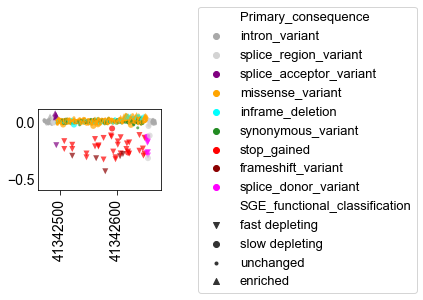

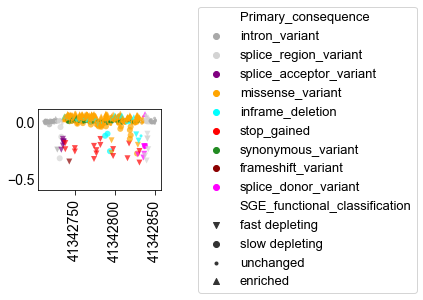

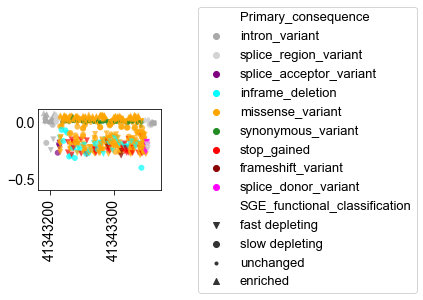

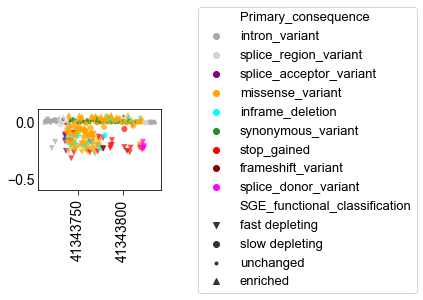

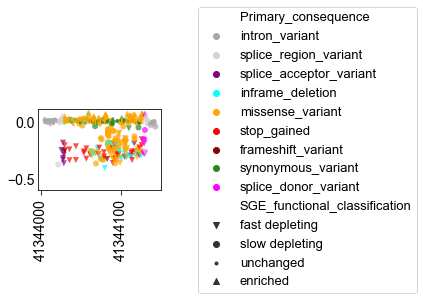

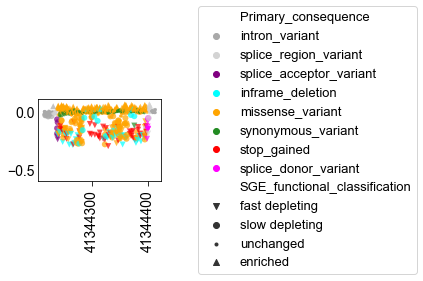

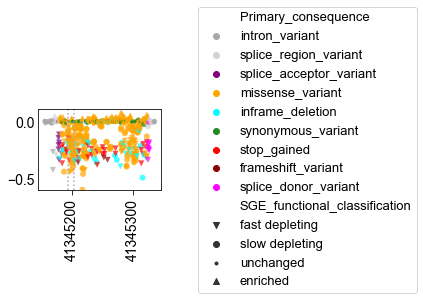

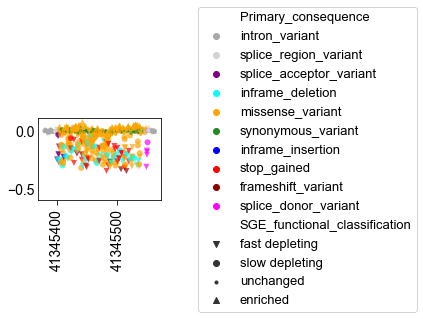

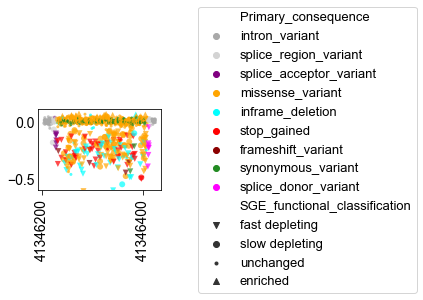

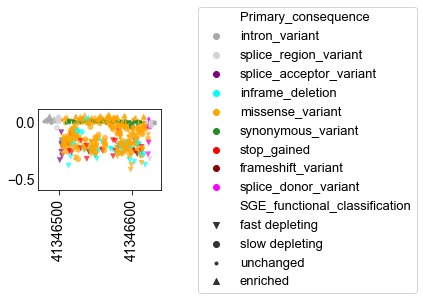

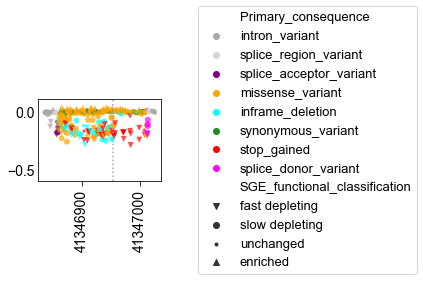

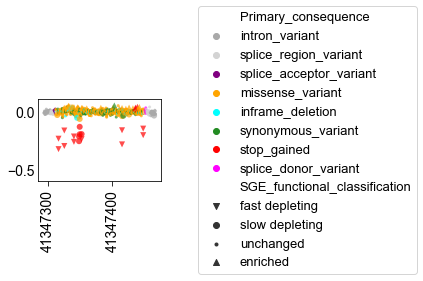

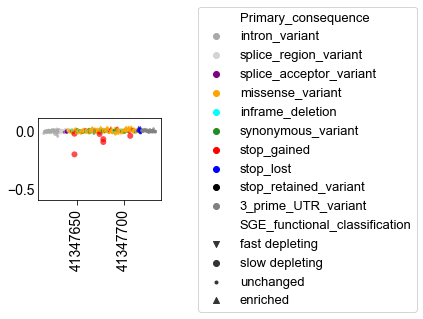

In [6]:
for entry in exons:
    exon, label = entry
    color_dict = dict({'start_lost':'cornflowerblue', 'inframe_deletion':'cyan', 'inframe_insertion':'blue', 'splice_acceptor_variant':'purple','splice_donor_variant':'fuchsia', 'stop_gained':'red', 
                       'missense_variant':'orange', 'intron_variant':'darkgrey', '5_prime_UTR_variant':'grey', 'synonymous_variant':'forestgreen', 'frameshift_variant':'darkred', 'splice_region_variant':'lightgrey', 'stop_lost':'blue', '3_prime_UTR_variant':'grey', 'stop_retained_variant':'black'})

    fig, ax = plt.subplots()
    g=sns.scatterplot(x="VCF_position", y="cLFC_trend",
                    hue="Primary_consequence", palette=color_dict, style='SGE_functional_classification', 
                      markers = ['v', 'o', '.', '^'] , style_order = ['fast depleting', 'slow depleting', 'unchanged', 'enriched'], legend=True, linewidth=0.01,
                    alpha=0.7, data=exon, ax=ax)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=13)
    formatter = mpl.ticker.FormatStrFormatter('%d')
    ax.set_xlabel('', fontsize=14)
    ax.set_ylabel('', fontsize=14)
    ax.tick_params(axis='x', rotation=90, length=5, labelsize=14)
    ax.tick_params(axis='y', length=0, labelsize=14)
    ax.set_ylim(-0.6,0.11)
    ax.xaxis.set_major_formatter(formatter)
    fig.set_size_inches(2.2,1.5)
    if label == '15': 
        plt.axvline(x=41346954, color = 'darkgrey', linestyle='dotted')
    if label == '11':
        #ax.plot((0,1), (0,1), alpha=0.75, color='lightgrey', zorder=0, linestyle='dotted')  
        plt.axvline(x=41345193, color = 'darkgrey', linestyle='dotted')
        plt.axvline(x=41345204, color = 'darkgrey', linestyle='dotted')
    

    plt.savefig(out_files+'/Fig3A_exonplot_ex'+label+'.pdf', dpi=1300, bbox_inches='tight', transparent = True)
    

In [10]:
# edit the below to change the variant type being assessed
consequences=['spliceAD', 'codon_deletion', 'Nonsense', 'Missense']

for cons in consequences:
    if cons == 'Nonsense':
        exon1=not_snvre.query('SGE_exon_group == 1 and Primary_consequence == "stop_gained"')
        exon2=not_snvre.query('SGE_exon_group == 2 and Primary_consequence == "stop_gained"')
        exon3=not_snvre.query('SGE_exon_group == 3 and Primary_consequence == "stop_gained"')
        exon4=not_snvre.query('SGE_exon_group == 4 and Primary_consequence == "stop_gained"')
        exon5=not_snvre.query('SGE_exon_group == 5 and Primary_consequence == "stop_gained"')
        exon6=not_snvre.query('SGE_exon_group == 6 and Primary_consequence == "stop_gained"')
        exon7=not_snvre.query('SGE_exon_group == 7 and Primary_consequence == "stop_gained"')
        exon8=not_snvre.query('SGE_exon_group == 8 and Primary_consequence == "stop_gained"')
        exon9=not_snvre.query('SGE_exon_group == 9 and Primary_consequence == "stop_gained"')
        exon10=not_snvre.query('SGE_exon_group == 10 and Primary_consequence == "stop_gained"')
        exon11=not_snvre.query('SGE_exon_group == 11 and Primary_consequence == "stop_gained"')
        exon12=not_snvre.query('SGE_exon_group == 12 and Primary_consequence == "stop_gained"')
        exon13=not_snvre.query('SGE_exon_group == 13 and Primary_consequence == "stop_gained"')
        exon14=not_snvre.query('SGE_exon_group == 14 and Primary_consequence == "stop_gained"')
        exon15=not_snvre.query('SGE_exon_group == 15 and Primary_consequence == "stop_gained"')
        exon16=not_snvre.query('SGE_exon_group == 16 and Primary_consequence == "stop_gained"')
        exon17=not_snvre.query('SGE_exon_group == 17 and Primary_consequence == "stop_gained"')
    elif cons == 'spliceAD':
        exon1=not_snvre.query('SGE_exon_group == 1 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 1 and Primary_consequence == "splice_donor_variant"')
        exon2=not_snvre.query('SGE_exon_group == 2 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 2 and Primary_consequence == "splice_donor_variant"')
        exon3=not_snvre.query('SGE_exon_group == 3 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 3 and Primary_consequence == "splice_donor_variant"')
        exon4=not_snvre.query('SGE_exon_group == 4 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 4 and Primary_consequence == "splice_donor_variant"')
        exon5=not_snvre.query('SGE_exon_group == 5 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 5 and Primary_consequence == "splice_donor_variant"')
        exon6=not_snvre.query('SGE_exon_group == 6 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 6 and Primary_consequence == "splice_donor_variant"')
        exon7=not_snvre.query('SGE_exon_group == 7 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 7 and Primary_consequence == "splice_donor_variant"')
        exon8=not_snvre.query('SGE_exon_group == 8 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 8 and Primary_consequence == "splice_donor_variant"')
        exon9=not_snvre.query('SGE_exon_group == 9 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 9 and Primary_consequence == "splice_donor_variant"')
        exon10=not_snvre.query('SGE_exon_group == 10 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 10 and Primary_consequence == "splice_donor_variant"')
        exon11=not_snvre.query('SGE_exon_group == 11 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 11 and Primary_consequence == "splice_donor_variant"')
        exon12=not_snvre.query('SGE_exon_group == 12 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 12 and Primary_consequence == "splice_donor_variant"')
        exon13=not_snvre.query('SGE_exon_group == 13 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 13 and Primary_consequence == "splice_donor_variant"')
        exon14=not_snvre.query('SGE_exon_group == 14 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 14 and Primary_consequence == "splice_donor_variant"')
        exon15=not_snvre.query('SGE_exon_group == 15 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 15 and Primary_consequence == "splice_donor_variant"')
        exon16=not_snvre.query('SGE_exon_group == 16 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 16 and Primary_consequence == "splice_donor_variant"')
        exon17=not_snvre.query('SGE_exon_group == 17 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 17 and Primary_consequence == "splice_donor_variant"')
    elif cons == 'codon_deletion':
        exon1=not_snvre.query('SGE_exon_group == 1 and Primary_consequence == "inframe_deletion"')
        exon2=not_snvre.query('SGE_exon_group == 2 and Primary_consequence == "inframe_deletion"')
        exon3=not_snvre.query('SGE_exon_group == 3 and Primary_consequence == "inframe_deletion"')
        exon4=not_snvre.query('SGE_exon_group == 4 and Primary_consequence == "inframe_deletion"')
        exon5=not_snvre.query('SGE_exon_group == 5 and Primary_consequence == "inframe_deletion"')
        exon6=not_snvre.query('SGE_exon_group == 6 and Primary_consequence == "inframe_deletion"')
        exon7=not_snvre.query('SGE_exon_group == 7 and Primary_consequence == "inframe_deletion"')
        exon8=not_snvre.query('SGE_exon_group == 8 and Primary_consequence == "inframe_deletion"')
        exon9=not_snvre.query('SGE_exon_group == 9 and Primary_consequence == "inframe_deletion"')
        exon10=not_snvre.query('SGE_exon_group == 10 and Primary_consequence == "inframe_deletion"')
        exon11=not_snvre.query('SGE_exon_group == 11 and Primary_consequence == "inframe_deletion"')
        exon12=not_snvre.query('SGE_exon_group == 12 and Primary_consequence == "inframe_deletion"')
        exon13=not_snvre.query('SGE_exon_group == 13 and Primary_consequence == "inframe_deletion"')
        exon14=not_snvre.query('SGE_exon_group == 14 and Primary_consequence == "inframe_deletion"')
        exon15=not_snvre.query('SGE_exon_group == 15 and Primary_consequence == "inframe_deletion"')
        exon16=not_snvre.query('SGE_exon_group == 16 and Primary_consequence == "inframe_deletion"')
        exon17=not_snvre.query('SGE_exon_group == 17 and Primary_consequence == "inframe_deletion"')
    elif cons == 'Missense':
        exon1=not_snvre.query('SGE_exon_group == 1 and Primary_consequence == "missense_variant"')
        exon2=not_snvre.query('SGE_exon_group == 2 and Primary_consequence == "missense_variant"')
        exon3=not_snvre.query('SGE_exon_group == 3 and Primary_consequence == "missense_variant"')
        exon4=not_snvre.query('SGE_exon_group == 4 and Primary_consequence == "missense_variant"')
        exon5=not_snvre.query('SGE_exon_group == 5 and Primary_consequence == "missense_variant"')
        exon6=not_snvre.query('SGE_exon_group == 6 and Primary_consequence == "missense_variant"')
        exon7=not_snvre.query('SGE_exon_group == 7 and Primary_consequence == "missense_variant"')
        exon8=not_snvre.query('SGE_exon_group == 8 and Primary_consequence == "missense_variant"')
        exon9=not_snvre.query('SGE_exon_group == 9 and Primary_consequence == "missense_variant"')
        exon10=not_snvre.query('SGE_exon_group == 10 and Primary_consequence == "missense_variant"')
        exon11=not_snvre.query('SGE_exon_group == 11 and Primary_consequence == "missense_variant"')
        exon12=not_snvre.query('SGE_exon_group == 12 and Primary_consequence == "missense_variant"')
        exon13=not_snvre.query('SGE_exon_group == 13 and Primary_consequence == "missense_variant"')
        exon14=not_snvre.query('SGE_exon_group == 14 and Primary_consequence == "missense_variant"')
        exon15=not_snvre.query('SGE_exon_group == 15 and Primary_consequence == "missense_variant"')
        exon16=not_snvre.query('SGE_exon_group == 16 and Primary_consequence == "missense_variant"')
        exon17=not_snvre.query('SGE_exon_group == 17 and Primary_consequence == "missense_variant"')

    exon1_fastdep = exon1.query('SGE_functional_classification == "fast depleting"')
    exon2_fastdep = exon2.query('SGE_functional_classification == "fast depleting"')
    exon3_fastdep = exon3.query('SGE_functional_classification == "fast depleting"')
    exon4_fastdep = exon4.query('SGE_functional_classification == "fast depleting"')
    exon5_fastdep = exon5.query('SGE_functional_classification == "fast depleting"')
    exon6_fastdep = exon6.query('SGE_functional_classification == "fast depleting"')
    exon7_fastdep = exon7.query('SGE_functional_classification == "fast depleting"')
    exon8_fastdep = exon8.query('SGE_functional_classification == "fast depleting"')
    exon9_fastdep = exon9.query('SGE_functional_classification == "fast depleting"')
    exon10_fastdep = exon10.query('SGE_functional_classification == "fast depleting"')
    exon11_fastdep = exon11.query('SGE_functional_classification == "fast depleting"')
    exon12_fastdep = exon12.query('SGE_functional_classification == "fast depleting"')
    exon13_fastdep = exon13.query('SGE_functional_classification == "fast depleting"')
    exon14_fastdep = exon14.query('SGE_functional_classification == "fast depleting"')
    exon15_fastdep = exon15.query('SGE_functional_classification == "fast depleting"')
    exon16_fastdep = exon16.query('SGE_functional_classification == "fast depleting"')
    exon17_fastdep = exon17.query('SGE_functional_classification == "fast depleting"')

    exon1_slowdep = exon1.query('SGE_functional_classification == "slow depleting"')
    exon2_slowdep = exon2.query('SGE_functional_classification == "slow depleting"')
    exon3_slowdep = exon3.query('SGE_functional_classification == "slow depleting"')
    exon4_slowdep = exon4.query('SGE_functional_classification == "slow depleting"')
    exon5_slowdep = exon5.query('SGE_functional_classification == "slow depleting"')
    exon6_slowdep = exon6.query('SGE_functional_classification == "slow depleting"')
    exon7_slowdep = exon7.query('SGE_functional_classification == "slow depleting"')
    exon8_slowdep = exon8.query('SGE_functional_classification == "slow depleting"')
    exon9_slowdep = exon9.query('SGE_functional_classification == "slow depleting"')
    exon10_slowdep = exon10.query('SGE_functional_classification == "slow depleting"')
    exon11_slowdep = exon11.query('SGE_functional_classification == "slow depleting"')
    exon12_slowdep = exon12.query('SGE_functional_classification == "slow depleting"')
    exon13_slowdep = exon13.query('SGE_functional_classification == "slow depleting"')
    exon14_slowdep = exon14.query('SGE_functional_classification == "slow depleting"')
    exon15_slowdep = exon15.query('SGE_functional_classification == "slow depleting"')
    exon16_slowdep = exon16.query('SGE_functional_classification == "slow depleting"')
    exon17_slowdep = exon17.query('SGE_functional_classification == "slow depleting"')

    exon1_enriched = exon1.query('SGE_functional_classification == "enriched"')
    exon2_enriched = exon2.query('SGE_functional_classification == "enriched"')
    exon3_enriched = exon3.query('SGE_functional_classification == "enriched"')
    exon4_enriched = exon4.query('SGE_functional_classification == "enriched"')
    exon5_enriched = exon5.query('SGE_functional_classification == "enriched"')
    exon6_enriched = exon6.query('SGE_functional_classification == "enriched"')
    exon7_enriched = exon7.query('SGE_functional_classification == "enriched"')
    exon8_enriched = exon8.query('SGE_functional_classification == "enriched"')
    exon9_enriched = exon9.query('SGE_functional_classification == "enriched"')
    exon10_enriched = exon10.query('SGE_functional_classification == "enriched"')
    exon11_enriched = exon11.query('SGE_functional_classification == "enriched"')
    exon12_enriched = exon12.query('SGE_functional_classification == "enriched"')
    exon13_enriched = exon13.query('SGE_functional_classification == "enriched"')
    exon14_enriched = exon14.query('SGE_functional_classification == "enriched"')
    exon15_enriched = exon15.query('SGE_functional_classification == "enriched"')
    exon16_enriched = exon16.query('SGE_functional_classification == "enriched"')
    exon17_enriched = exon17.query('SGE_functional_classification == "enriched"')

    exon1_unchanged = exon1.query('SGE_functional_classification == "unchanged"')
    exon2_unchanged = exon2.query('SGE_functional_classification == "unchanged"')
    exon3_unchanged = exon3.query('SGE_functional_classification == "unchanged"')
    exon4_unchanged = exon4.query('SGE_functional_classification == "unchanged"')
    exon5_unchanged = exon5.query('SGE_functional_classification == "unchanged"')
    exon6_unchanged = exon6.query('SGE_functional_classification == "unchanged"')
    exon7_unchanged = exon7.query('SGE_functional_classification == "unchanged"')
    exon8_unchanged = exon8.query('SGE_functional_classification == "unchanged"')
    exon9_unchanged = exon9.query('SGE_functional_classification == "unchanged"')
    exon10_unchanged = exon10.query('SGE_functional_classification == "unchanged"')
    exon11_unchanged = exon11.query('SGE_functional_classification == "unchanged"')
    exon12_unchanged = exon12.query('SGE_functional_classification == "unchanged"')
    exon13_unchanged = exon13.query('SGE_functional_classification == "unchanged"')
    exon14_unchanged = exon14.query('SGE_functional_classification == "unchanged"')
    exon15_unchanged = exon15.query('SGE_functional_classification == "unchanged"')
    exon16_unchanged = exon16.query('SGE_functional_classification == "unchanged"')
    exon17_unchanged = exon17.query('SGE_functional_classification == "unchanged"')

    with open(out_files+'/D15_Prop_SGE_functional_classification_'+cons+'_vars_by_exon.txt', 'w') as out:
            header = '\t'.join(['x_axis_spacing','Fast Depleting', 'Slow Depleting', 'Unchanged', 'Enriched'])+'\n'
            out.write(header)
            line1='\t'.join(['0', str(100*len(exon1_fastdep)/len(exon1)), str(100*len(exon1_slowdep)/len(exon1)),   str(100*len(exon1_unchanged)/len(exon1)), str(100*len(exon1_enriched)/len(exon1))])+'\n'
            line2='\t'.join(['1', str(100*len(exon2_fastdep)/len(exon2)),  str(100*len(exon2_slowdep)/len(exon2)),   str(100*len(exon2_unchanged)/len(exon2)), str(100*len(exon2_enriched)/len(exon2))])+'\n'
            line3='\t'.join(['2', str(100*len(exon3_fastdep)/len(exon3)), str(100*len(exon3_slowdep)/len(exon3)),   str(100*len(exon3_unchanged)/len(exon3)), str(100*len(exon3_enriched)/len(exon3))])+'\n'
            line4='\t'.join(['3.3', str(100*len(exon4_fastdep)/len(exon4)),str(100*len(exon4_slowdep)/len(exon4)),   str(100*len(exon4_unchanged)/len(exon4)), str(100*len(exon4_enriched)/len(exon4))])+'\n'
            line5='\t'.join(['5.5', str(100*len(exon5_fastdep)/len(exon5)), str(100*len(exon5_slowdep)/len(exon5)),   str(100*len(exon5_unchanged)/len(exon5)), str(100*len(exon5_enriched)/len(exon5))])+'\n'
            line6='\t'.join(['7.5', str(100*len(exon6_fastdep)/len(exon6)), str(100*len(exon6_slowdep)/len(exon6)),  str(100*len(exon6_unchanged)/len(exon6)), str(100*len(exon6_enriched)/len(exon6))])+'\n'
            line7='\t'.join(['9.4', str(100*len(exon7_fastdep)/len(exon7)), str(100*len(exon7_slowdep)/len(exon7)),   str(100*len(exon7_unchanged)/len(exon7)), str(100*len(exon7_enriched)/len(exon7))])+'\n'
            line8='\t'.join(['11.1', str(100*len(exon8_fastdep)/len(exon8)), str(100*len(exon8_slowdep)/len(exon8)),   str(100*len(exon8_unchanged)/len(exon8)), str(100*len(exon8_enriched)/len(exon8))])+'\n'
            line9='\t'.join(['12.7', str(100*len(exon9_fastdep)/len(exon9)),str(100*len(exon9_slowdep)/len(exon9)),   str(100*len(exon9_unchanged)/len(exon9)), str(100*len(exon9_enriched)/len(exon9))])+'\n'
            line10='\t'.join(['14.7', str(100*len(exon10_fastdep)/len(exon10)),str(100*len(exon10_slowdep)/len(exon10)),   str(100*len(exon10_unchanged)/len(exon10)), str(100*len(exon10_enriched)/len(exon10))])+'\n'
            line11='\t'.join(['17.1', str(100*len(exon11_fastdep)/len(exon11)),str(100*len(exon11_slowdep)/len(exon11)),   str(100*len(exon11_unchanged)/len(exon11)), str(100*len(exon11_enriched)/len(exon11))])+'\n'
            line12='\t'.join(['19.3', str(100*len(exon12_fastdep)/len(exon12)), str(100*len(exon12_slowdep)/len(exon12)),  str(100*len(exon12_unchanged)/len(exon12)), str(100*len(exon12_enriched)/len(exon12))])+'\n'
            line13='\t'.join(['21.8', str(100*len(exon13_fastdep)/len(exon13)), str(100*len(exon13_slowdep)/len(exon13)),  str(100*len(exon13_unchanged)/len(exon13)), str(100*len(exon13_enriched)/len(exon13))])+'\n'
            line14='\t'.join(['24.3', str(100*len(exon14_fastdep)/len(exon14)), str(100*len(exon14_slowdep)/len(exon14)),  str(100*len(exon14_unchanged)/len(exon14)), str(100*len(exon14_enriched)/len(exon14))])+'\n'
            line15='\t'.join(['26.4', str(100*len(exon15_fastdep)/len(exon15)), str(100*len(exon15_slowdep)/len(exon15)),  str(100*len(exon15_unchanged)/len(exon15)), str(100*len(exon15_enriched)/len(exon15))])+'\n'
            line16='\t'.join(['28.8', str(100*len(exon16_fastdep)/len(exon16)), str(100*len(exon16_slowdep)/len(exon16)), str(100*len(exon16_unchanged)/len(exon16)), str(100*len(exon16_enriched)/len(exon16))])+'\n'
            line17='\t'.join(['30.4', str(100*len(exon17_fastdep)/len(exon17)), str(100*len(exon17_slowdep)/len(exon17)),  str(100*len(exon17_unchanged)/len(exon17)), str(100*len(exon17_enriched)/len(exon17))])+'\n'
            out.write(line1)
            out.write(line2)
            out.write(line3)
            out.write(line4)
            out.write(line5)
            out.write(line6)
            out.write(line7)
            out.write(line8)
            out.write(line9)
            out.write(line10)
            out.write(line11)
            out.write(line12)
            out.write(line13)
            out.write(line14)
            out.write(line15)
            out.write(line16)
            out.write(line17)

# The following list gives exon frame info for the likely impact of exon skipping.
exon_frame_list=[(1,'inframe (start lost)'),
           (2,'out of frame'),
           (3,'inframe'),
          (4,'out of frame'),
          (5,'inframe'),
          (6,'out of frame'),(7,'out of frame'),(8,'out of frame'),(9,'inframe'),(10,'out of frame'),(11,'out of frame'),(12,'out of frame'),(13,'out of frame'),(14,'out of frame'),
                 (15,'out of frame'),(16,'out of frame'),(17,)]

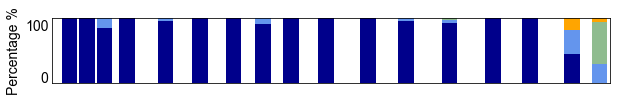

scp er10@gen3-head1://nfs/users/nfs_e/er10/SGE/data/Release_4/Figure_plots/Fig3B_Nonsense_vars_by_exon.pdf /Users/er10/Documents/Results/SGE_data/Release_4/Figure_plots/Fig3B_Nonsense_vars_by_exon.pdf


In [11]:
df = pd.read_csv(out_files+'/D15_Prop_SGE_functional_classification_Nonsense_vars_by_exon.txt', '\t')
labels = df['x_axis_spacing']
FD = df['Fast Depleting']
SD = df['Slow Depleting']
stack1 = FD+SD
U=df['Unchanged']
stack2 = stack1+U
E=df['Enriched']
width = 0.9

plt.rcParams["figure.figsize"] = (10,1.2)
fig, ax = plt.subplots()

ax.bar(labels, FD, width,  label='Fast Depleting', color='darkblue')
ax.bar(labels, SD, width,  color='cornflowerblue', bottom=FD, label='Slow Depleting')
ax.bar(labels, U, width, color='darkseagreen', bottom = stack1)
ax.bar(labels, E, width, color='orange', bottom=stack2, label='Enriched')
ax.tick_params(axis='y', length=0, labelsize=14)
ax.tick_params(axis='x', length=0)
ax.set_xlim(-1, 31)
plt.yticks([10,90],['0','100'])

plt.xticks([0,1,2,3.3,5.5,7.5,9.4,11.1, 12.7, 14.7, 17.1, 19.3, 21.8, 24.3, 26.4, 28.8, 30.4],['1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
ax.set_ylabel('Percentage %', fontsize=14)
ax.set(xlabel=None, xticklabels=[])
plt.savefig(out_files+'/Fig3C_Nonsense_vars_by_exon.pdf', dpi=1300, bbox_inches='tight', transparent = True)
plt.show()


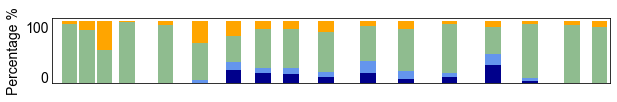

scp er10@gen3-head1://nfs/users/nfs_e/er10/SGE/data/Release_4/Figure_plots/Fig3B_Missense_vars_by_exon.pdf /Users/er10/Documents/Results/SGE_data/Release_4/Figure_plots/Fig3B_Missense_vars_by_exon.pdf


In [12]:
df = pd.read_csv(out_files+'/D15_Prop_SGE_functional_classification_Missense_vars_by_exon.txt', '\t')
labels = df['x_axis_spacing']
FD = df['Fast Depleting']
SD = df['Slow Depleting']
stack1 = FD+SD
U=df['Unchanged']
stack2 = stack1+U
E=df['Enriched']
width = 0.9

plt.rcParams["figure.figsize"] = (10,1.2)
fig, ax = plt.subplots()

ax.bar(labels, FD, width,  label='Fast Depleting', color='darkblue')
ax.bar(labels, SD, width,  color='cornflowerblue', bottom=FD, label='Slow Depleting')
ax.bar(labels, U, width, color='darkseagreen', bottom = stack1)
ax.bar(labels, E, width, color='orange', bottom=stack2, label='Enriched')
ax.tick_params(axis='y', length=0, labelsize=14)
ax.tick_params(axis='x', length=0)
ax.set_xlim(-1, 31)
plt.yticks([10,90],['0','100'])

plt.xticks([0,1,2,3.3,5.5,7.5,9.4,11.1, 12.7, 14.7, 17.1, 19.3, 21.8, 24.3, 26.4, 28.8, 30.4],['1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
ax.set_ylabel('Percentage %', fontsize=14)
ax.set(xlabel=None, xticklabels=[])
plt.savefig(out_files+'/Fig3C_Missense_vars_by_exon.pdf', dpi=1300, bbox_inches='tight', transparent = True)
plt.show()


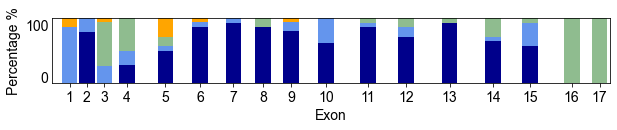

scp er10@gen3-head1://nfs/users/nfs_e/er10/SGE/data/Release_4/Figure_plots/Fig3B_SpliceAD_vars_by_exon.pdf /Users/er10/Documents/Results/SGE_data/Release_4/Figure_plots/Fig3B_SpliceAD_vars_by_exon.pdf


In [13]:
df = pd.read_csv(out_files+'/D15_Prop_SGE_functional_classification_spliceAD_vars_by_exon.txt', '\t')
labels = df['x_axis_spacing']
FD = df['Fast Depleting']
SD = df['Slow Depleting']
stack1 = FD+SD
U=df['Unchanged']
stack2 = stack1+U
E=df['Enriched']
width = 0.9

plt.rcParams["figure.figsize"] = (10,1.2)
fig, ax = plt.subplots()

ax.bar(labels, FD, width,  label='Fast Depleting', color='darkblue')
ax.bar(labels, SD, width,  color='cornflowerblue', bottom=FD, label='Slow Depleting')
ax.bar(labels, U, width, color='darkseagreen', bottom = stack1)
ax.bar(labels, E, width, color='orange', bottom=stack2, label='Enriched')
ax.tick_params(axis='y', length=0, labelsize=14)
ax.tick_params(axis='x', length=4, labelsize=14)
ax.set_xlim(-1, 31)
plt.yticks([10,90],['0','100'])

plt.xticks([0,1,2,3.3,5.5,7.5,9.4,11.1, 12.7, 14.7, 17.1, 19.3, 21.8, 24.3, 26.4, 28.8, 30.4],['1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
ax.set_ylabel('Percentage %', fontsize=14)
ax.set_xlabel('Exon', fontsize=14)
plt.savefig(out_files+'/Fig3C_SpliceAD_vars_by_exon.pdf', dpi=1300, bbox_inches='tight', transparent = True)
plt.show()


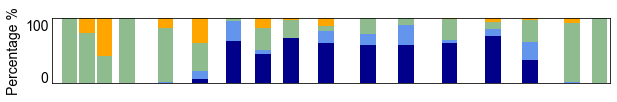

scp er10@gen3-head1://nfs/users/nfs_e/er10/SGE/data/Release_4/Figure_plots/Fig3B_codon_deletions_by_exon.pdf /Users/er10/Documents/Results/SGE_data/Release_4/Figure_plots/Fig3B_codon_deletions_by_exon.pdf


In [14]:
df = pd.read_csv(out_files+'/D15_Prop_SGE_functional_classification_codon_deletion_vars_by_exon.txt', '\t')
labels = df['x_axis_spacing']
FD = df['Fast Depleting']
SD = df['Slow Depleting']
stack1 = FD+SD
U=df['Unchanged']
stack2 = stack1+U
E=df['Enriched']
width = 0.9

plt.rcParams["figure.figsize"] = (10,1.2)
fig, ax = plt.subplots()

ax.bar(labels, FD, width,  label='Fast Depleting', color='darkblue')
ax.bar(labels, SD, width,  color='cornflowerblue', bottom=FD, label='Slow Depleting')
ax.bar(labels, U, width, color='darkseagreen', bottom = stack1)
ax.bar(labels, E, width, color='orange', bottom=stack2, label='Enriched')
ax.tick_params(axis='y', length=0, labelsize=14)
ax.tick_params(axis='x', length=0)
ax.set_xlim(-1, 31)
plt.yticks([10,90],['0','100'])

plt.xticks([0,1,2,3.3,5.5,7.5,9.4,11.1, 12.7, 14.7, 17.1, 19.3, 21.8, 24.3, 26.4, 28.8, 30.4],['1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17'])
ax.set_ylabel('Percentage %', fontsize=14)
ax.set(xlabel=None, xticklabels=[])
plt.savefig(out_files+'/Fig3C_codon_deletions_by_exon.pdf', dpi=1300, bbox_inches='tight', transparent = True)
plt.show()


<ipython-input-15-3fd877b6e53c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta['SpliceAI_Delta_score'] = pd.to_numeric(delta['SpliceAI_Delta_score'])


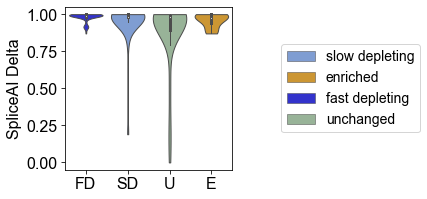

scp er10@gen3-head1://nfs/users/nfs_e/er10/SGE/data/Release_4/Figure_plots/Fig3D_spliceAI_delta.pdf /Users/er10/Documents/Results/SGE_data/Release_4/Figure_plots/Fig3D_spliceAI_delta.pdf


In [15]:
canonicalAD = not_snvre.query('Primary_consequence == "splice_acceptor_variant" or Primary_consequence == "splice_donor_variant"')
delta=canonicalAD.query('SpliceAI_Delta_score !="-" and SpliceAI_Delta_score !="NaN"')
delta['SpliceAI_Delta_score'] = pd.to_numeric(delta['SpliceAI_Delta_score'])
delta['SpliceAI_Delta_score']

plt.rcParams["figure.figsize"] = (3,3)
fig, ax = plt.subplots()
color_dict={'unchanged':'darkseagreen', 'enriched':'orange',  'slow depleting':'cornflowerblue', 'fast depleting':'blue'}
g=sns.violinplot(data=delta, x='SGE_functional_classification', y='SpliceAI_Delta_score', cut=0, hue = "SGE_functional_classification", palette = color_dict, order=['fast depleting', 'slow depleting', 'unchanged','enriched'], inner='box', linewidth=1, dodge=False, saturation=0.6, fontsize=14)
ax.set_xlabel('')
ax.set_xticklabels(['FD', 'SD', 'U', 'E'], fontsize=16)
ax.set_ylabel('SpliceAI Delta', fontsize=16)
ax.tick_params(axis='y', length=4, labelsize=16)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=14)

plt.savefig(out_files+'/Fig3D_spliceAI_delta.pdf', dpi=1300, bbox_inches='tight', transparent = True)
plt.show()


In [16]:
# stats for splice A/D sites spliceAI scores
delta['spliceAI_Delta_default_rank'] = delta['SpliceAI_Delta_score'].rank()

spliceAI_FD = delta.query('SGE_functional_classification == "fast depleting"')['spliceAI_Delta_default_rank']
spliceAI_SD = delta.query('SGE_functional_classification == "slow depleting"')['spliceAI_Delta_default_rank']
spliceAI_E= delta.query('SGE_functional_classification == "enriched"')['spliceAI_Delta_default_rank']
spliceAI_U= delta.query('SGE_functional_classification == "unchanged"')['spliceAI_Delta_default_rank']
spliceAI_for_dunn = delta[['SGE_functional_classification', 'spliceAI_Delta_default_rank']]

print('KW for spliceAI scores depleted vs enriched')
print(stats.kruskal(spliceAI_U, spliceAI_FD, spliceAI_SD, spliceAI_E))
# Dunn's post-hoc test for CADD scores
sp.posthoc_dunn(spliceAI_for_dunn, val_col = 'spliceAI_Delta_default_rank', group_col = 'SGE_functional_classification', p_adjust = 'fdr_bh')


KW for spliceAI scores depleted vs enriched
KruskalResult(statistic=14.497709604518743, pvalue=0.0023003219416121287)


<ipython-input-16-68543137a635>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta['spliceAI_Delta_default_rank'] = delta['SpliceAI_Delta_score'].rank()


,enriched,fast depleting,slow depleting,unchanged
enriched,1.000000,0.360495,0.665697,0.665697
fast depleting,0.360495,1.000000,0.349627,0.001196
slow depleting,0.665697,0.349627,1.000000,0.313790
unchanged,0.665697,0.001196,0.313790,1.000000


In [17]:
# Depleted vs enriched

def f(row):
    if row['SGE_functional_classification']== "fast depleting":
        val = 'depleted'
    elif row['SGE_functional_classification']== "slow depleting":
        val = 'depleted'
    elif row['SGE_functional_classification']== "enriched":
        val = 'enriched'
    elif row['SGE_functional_classification']== "unchanged":
        val = 'unchanged'
    return val

delta['SGE_func_class_condensed'] = delta.apply(f, axis=1)

spliceAI_D = delta.query('SGE_func_class_condensed == "depleted"')['spliceAI_Delta_default_rank']
spliceAI_E= delta.query('SGE_func_class_condensed == "enriched"')['spliceAI_Delta_default_rank']
spliceAI_U= delta.query('SGE_func_class_condensed == "unchanged"')['spliceAI_Delta_default_rank']
spliceAI_for_dunn = delta[['SGE_func_class_condensed', 'spliceAI_Delta_default_rank']]

print('KW for spliceAI scores depleted vs enriched')
print(stats.kruskal(spliceAI_U, spliceAI_D, spliceAI_E))
# Dunn's post-hoc test for CADD scores
sp.posthoc_dunn(spliceAI_for_dunn, val_col = 'spliceAI_Delta_default_rank', group_col = 'SGE_func_class_condensed', p_adjust = 'fdr_bh')

KW for spliceAI scores depleted vs enriched
KruskalResult(statistic=12.656536970265302, pvalue=0.0017851220600060215)


<ipython-input-17-00edc2ccbec9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta['SGE_func_class_condensed'] = delta.apply(f, axis=1)


,depleted,enriched,unchanged
depleted,1.000000,0.454482,0.001426
enriched,0.454482,1.000000,0.623043
unchanged,0.001426,0.623043,1.000000


In [18]:
delta=not_snvre.query('SpliceAI_Delta_score !="-" and SpliceAI_Delta_score !="NaN"')
delta['SpliceAI_Delta_score'] = pd.to_numeric(delta['SpliceAI_Delta_score'])
delta['SpliceAI_Delta_score']
intronic = delta.query('INTRON != "-"')
non_canonical = intronic.query('Primary_consequence != "splice_acceptor_variant" and Primary_consequence != "splice_donor_variant"')
non_canonical['spliceAI_Delta_default_rank'] = non_canonical['SpliceAI_Delta_score'].rank()

NC_D=non_canonical.query('SGE_functional_classification == "slow depleting" or SGE_functional_classification == "fast depleting"')
NC_FD=non_canonical.query('SGE_functional_classification == "fast depleting"')['spliceAI_Delta_default_rank']
NC_SD=non_canonical.query('SGE_functional_classification == "slow depleting"')['spliceAI_Delta_default_rank']
NC_E=non_canonical.query('SGE_functional_classification == "enriched"')['spliceAI_Delta_default_rank']
NC_U=non_canonical.query('SGE_functional_classification == "unchanged"')['spliceAI_Delta_default_rank']

<ipython-input-18-af9091ff7af3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta['SpliceAI_Delta_score'] = pd.to_numeric(delta['SpliceAI_Delta_score'])
<ipython-input-18-af9091ff7af3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_canonical['spliceAI_Delta_default_rank'] = non_canonical['SpliceAI_Delta_score'].rank()


In [19]:
spliceAI_for_dunn = non_canonical[['SGE_functional_classification', 'spliceAI_Delta_default_rank']]

print('KW for spliceAI scores non-canonicalA/D intronic sites')
print(stats.kruskal(NC_U, NC_FD, NC_SD, NC_E))
# Dunn's post-hoc test for CADD scores
sp.posthoc_dunn(spliceAI_for_dunn, val_col = 'spliceAI_Delta_default_rank', group_col = 'SGE_functional_classification', p_adjust = 'fdr_bh')

KW for spliceAI scores non-canonicalA/D intronic sites
KruskalResult(statistic=250.4934819133504, pvalue=5.1179176504101207e-54)


,enriched,fast depleting,slow depleting,unchanged
enriched,1.000000e+00,1.518472e-04,5.128824e-04,1.574965e-27
fast depleting,1.518472e-04,1.000000e+00,8.062088e-10,2.822949e-28
slow depleting,5.128824e-04,8.062088e-10,1.000000e+00,1.129028e-05
unchanged,1.574965e-27,2.822949e-28,1.129028e-05,1.000000e+00


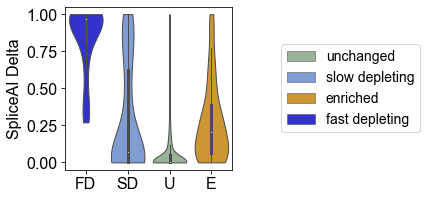

scp er10@gen3-head1://nfs/users/nfs_e/er10/SGE/data/Release_4/Figure_plots/Fig3E_spliceAI_delta.pdf /Users/er10/Documents/Results/SGE_data/Release_4/Figure_plots/Fig3E_spliceAI_delta.pdf


In [20]:
plt.rcParams["figure.figsize"] = (3,3)
fig, ax = plt.subplots()
color_dict={'unchanged':'darkseagreen', 'enriched':'orange',  'slow depleting':'cornflowerblue', 'fast depleting':'blue'}
g=sns.violinplot(data=non_canonical, x='SGE_functional_classification', y='SpliceAI_Delta_score', hue = "SGE_functional_classification", palette = color_dict, order=['fast depleting', 'slow depleting', 'unchanged','enriched'], inner='box', linewidth=1, dodge=False, saturation=0.6, fontsize=14, cut=0)
ax.set_xlabel('')
ax.set_xticklabels(['FD', 'SD', 'U', 'E'], fontsize=16)
ax.set_ylabel('SpliceAI Delta', fontsize=16)
ax.tick_params(axis='y', length=4, labelsize=16)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=14)

plt.savefig(out_files+'/Fig3E_spliceAI_delta.pdf', dpi=1300, bbox_inches='tight', transparent = True)
plt.show()
print('scp er10@gen3-head1://nfs/users/nfs_e/er10/SGE/data/Release_4/Figure_plots/Fig3E_spliceAI_delta.pdf /Users/er10/Documents/Results/SGE_data/Release_4/Figure_plots/Fig3E_spliceAI_delta.pdf')


In [10]:
# Look at all intronic variants and synonymous variants within 2bp of the splice acceptor or donor sites and examine impact across different exons

'''This list gives: 
    - exon number
    - acceptor site -1
    - donor site +1
    - whether the exon is in or out of frame'''

exon_list=[(1,41334253, 41334297, 'in'),
           (2,41337408,41337465,'out'),
           (3,41339036,41339083,'in'),
          (4,41341484,41341616,'out'),
          (5,41342495,41342653,'in'),
          (6,41342737,41342836,'out'),
          (7,41343216,41343351,'out'),
           (8,41343737,41343822,'out'),
           (9,41344030,41344128,'in'),
           (10,41344239,41344399,'out'),
           (11,41345180,41345324, 'out'),
           (12,41345404,41345548, 'out'),
           (13,41346229,41346410, 'out'),
           (14,41346505,41346622, 'out'),
           (15,41346859,41347012, 'out'),
           (16,41347312,41347451, 'out'),
           (17,41347640,41347719, 'NA')]
Py=['C', 'T']
Pu=['A', 'G']
polyPy_tract=[0,0]
with open(data_root+'Splice_sites_merged_over_exons.txt', 'w')as out:
    out_header = '\t'.join(['hg38_pos', 'ref', 'alt','Pop_db', 'splice_position', 'Base_change', 'LFC_trend', 'Depleted', 'Affected','SGE_functional_classification','exon', 'exon_frame', 'Primary_consequence'])+'\n'
    out.write(out_header)
    with open(data_root+'Table_S9_SGE_data_for_all_variants_tested_with_annotation.txt', 'r')as f:
        header=f.readline().strip().split('\t')
        print(header)
        pos_col=header.index('VCF_position')
        ref_col=header.index('VCF_Ref')
        alt_col=header.index('VCF_Alt')
        ref_aa_col=header.index('ref_aa')
        alt_aa_col=header.index('alt_aa')
        D15LFC_col=header.index('D15_combined_LFC')
        trend_col=header.index('cLFC_trend')
        prot_pos_col=header.index('Protein_position')
        aa_col=header.index('Amino_acids')
        mutator_col=header.index('Variant_design_type')
        cluster_col=header.index('SGE_functional_classification')
        cons_col=header.index('Primary_consequence')
        intronic_col=header.index('INTRON')
        DC_col=header.index('SGE_functional_classification')
        popDB_col=header.index('Population_database')
        lines=f.readlines()
        for line in lines:
            fields=line.strip().split('\t')
            pos=int(fields[pos_col].strip())
            ref=fields[ref_col].strip('""')
            alt=fields[alt_col].strip('""')
            prot_pos=fields[prot_pos_col].strip('""')
            aas=fields[aa_col].strip('""')
            cons=fields[cons_col].strip('""')
            intronic = fields[intronic_col].strip('""')
            trend=fields[trend_col].strip()
            DC=fields[DC_col].strip()
            depleted = ['fast depleting', 'slow depleting']
            popDB=fields[popDB_col].strip()
            if len(ref) == 1:
                if len(alt) == 1:
                    for exon_entry in exon_list:
                        exon, acceptor, donor, frame = exon_entry
                        if pos > acceptor:
                            if pos <(acceptor +3):
                                if '/' not in aas:
                                    S_pos = pos-acceptor
                                    #print('synonymous vars downstream of acceptor', S_pos, 'pos', pos, 'acceptor', acceptor, cons, aas)
                                    if ref in Py:
                                        if alt in Pu:
                                            base_change = 'PyPu'
                                        else:
                                            base_change = 'other'
                                    else:
                                        base_change = 'other'
                                    if DC in depleted:
                                        depleted = '1'
                                    else:
                                        depleted='0'
                                    if DC == "unchanged":
                                        affected='0'
                                    else:
                                        affected='1'
                                    out_line = '\t'.join([str(pos), ref, alt, popDB, str(S_pos),base_change,trend,depleted, affected, DC, str(exon), frame, cons])+'\n'
                                    out.write(out_line)
                        if pos < donor:
                            if pos >(donor -3):
                                if '/' not in aas:
                                    S_pos = 6-(donor-pos)
                                    #print('synonymous vars upstream of donor',S_pos, 'pos', pos, 'donor', donor, cons, aas)
                                    if ref in Py:
                                        if alt in Pu:
                                            base_change = 'PyPu'
                                        else:
                                            base_change = 'other'
                                    else:
                                        base_change = 'other'
                                    if DC in depleted:
                                        depleted = '1'
                                    else:
                                        depleted='0'
                                    if DC == "unchanged":
                                        affected='0'
                                    else:
                                        affected='1'
                                    out_line = '\t'.join([str(pos), ref, alt, popDB, str(S_pos),base_change,trend,depleted, affected, DC, str(exon), frame, cons])+'\n'
                                    out.write(out_line)
                        if intronic != '-':
                            if pos> (acceptor-26):
                                if pos < acceptor:
                                    if exon != 1:
                                        # exclude the first exon because the 5' UTR is upstream
                                        S_pos = pos-acceptor
                                        if ref in Py:
                                            if alt in Pu:
                                                base_change = 'PyPu'
                                            else:
                                                base_change = 'other'
                                        else:
                                            base_change = 'other'
                                        if DC in depleted:
                                            depleted = '1'
                                        else:
                                            depleted='0'
                                        if DC == "unchanged":
                                            affected='0'
                                        else:
                                            affected='1'
                                                                                
                                        out_line = '\t'.join([str(pos), ref, alt, popDB, str(S_pos),base_change,trend,depleted, affected, DC, str(exon), frame, cons])+'\n'
                                        out.write(out_line)
                            if pos> donor:
                                if pos < (donor+16):
                                    S_pos = 6+pos-donor
                                    #print('intronic downstream of donor', S_pos, 'pos', pos, 'donor', donor)
                                    if ref in Py:
                                        if alt in Pu:
                                            base_change = 'PyPu'
                                        else:
                                            base_change = 'other'
                                    else:
                                        base_change = 'other'
                                    if DC in depleted:
                                        depleted = '1'
                                    else:
                                        depleted='0'
                                    if DC == "unchanged":
                                        affected='0'
                                    else:
                                        affected='1'
                                    out_line = '\t'.join([str(pos), ref, alt, popDB,str(S_pos), base_change,trend, depleted, affected, DC,str(exon), frame, cons])+'\n'
                                    out.write(out_line)


['SGE_oligo_name', 'Variant_design_type', 'chrom', 'VCF_position', 'VCF_Ref', 'VCF_Alt', 'ref_codon', 'alt_codon', 'ref_aa', 'alt_aa', 'Amino_acids', 'Primary_consequence', 'Consequence', 'Variant_category', 'cDNA_position', 'CDS_position', 'Protein_position', 'EXON', 'INTRON', 'SGE_exon_group', 'D7_combined_LFC', 'D11_combined_LFC', 'D15_combined_LFC', 'D21_combined_LFC', 'cLFCd7_BH_FDR', 'cLFCd11_BH_FDR', 'cLFCd15_BH_FDR', 'cLFCd21_BH_FDR', 'cLFC_trend', 'cLFC_trend_BH_FDR', 'SGE_functional_classification', 'Category_for_RF', 'SGE_NDD_clinical_classification', 'NDD_clinical_classification_prob_var_functional', 'NDD_clinical_classification_prob_var_nonfunctional', 'mean_SASA', 'SASA_cat', 'Scorecons_aa_conservation', 'DeltaDeltaG', 'revel', 'SIFT', 'PolyPhen', 'CADD_PHRED', 'SpliceAI_Delta_score', 'Clinically_reported_variant', 'Population_database', 'GnomAD_maxAF', 'UKBB_AF', 'Simplified_protein_pos', 'PolyPhen_numeric', 'SIFT_numeric', 'Distance_to_core', 'SGE_prediction_of_variant_

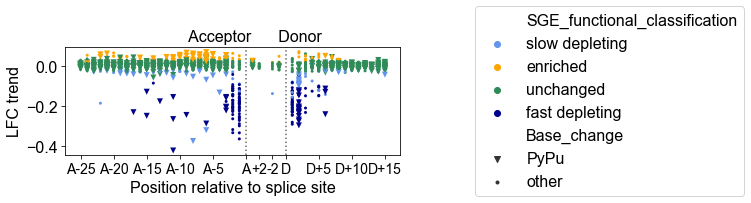

scp er10@gen3-head1://nfs/users/nfs_e/er10/SGE/data/Release_4/Figure_plots/Fig3D_LFC_trend_intronic_position.pdf /Users/er10/Documents/Results/SGE_data/Release_4/Figure_plots/Fig3D_LFC_trend_intronic_position.pdf


In [11]:
df=pd.read_csv(data_root+'/Splice_sites_merged_over_exons.txt', header=0, sep='\t',index_col=False)
plt.rcParams["figure.figsize"] = (6,2)
color_dict = dict({'fast depleting':'darkblue', 'slow depleting':'cornflowerblue', 'unchanged':'seagreen', 'enriched':'orange'})
fig, ax = plt.subplots()

g=sns.scatterplot(x="splice_position", y="LFC_trend",
                hue="SGE_functional_classification", palette=color_dict, markers = ['v', '.'] , style_order = ['PyPu', 'other'],  style='Base_change', 
                data=df, ax=ax, linewidth=0.01)
ax.tick_params(axis='y', length=4, labelsize=16)
g.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), ncol=1, fontsize=16)
plt.axvline(x=0, color = 'dimgrey', linestyle='dotted', label='A')
plt.axvline(x=6, color = 'dimgrey', linestyle='dotted', label='D')
plt.xticks([-25,-20,-15,-10,-5,0,2,4,6,11,16, 21],['A-25','A-20','A-15','A-10','A-5','A', '+2', '-2','D','D+5','D+10','D+15'], fontsize=14)
ax.set_xlabel('Position relative to splice site', fontsize=16)
plt.ylabel('LFC trend', fontsize=16)
plt.title('          Acceptor      Donor', fontsize=16)
plt.savefig(out_files+'/Fig3F_LFC_trend_intronic_position.pdf', dpi=1300, bbox_inches='tight', transparent = True)
plt.show()


In [12]:
df=pd.read_csv(data_root+'/Splice_sites_merged_over_exons.txt', header=0, sep='\t',index_col=False)
all_data=pd.read_csv(data_root+'Table_S9_SGE_data_for_all_variants_tested_with_annotation.txt', header=0, sep='\t',index_col=False)
snvs=all_data.query('Variant_design_type == "snv"')
intronic_snvs = snvs.query('INTRON != "-"')

polyPy_tract = df.query('splice_position<-2')
polyPy_tract_affected = polyPy_tract.query('SGE_functional_classification != "unchanged"')
polyPy_tract_unaffected = polyPy_tract.query('SGE_functional_classification == "unchanged"')
polyPy_tract_affected_PyPu = polyPy_tract_affected.query('Base_change == "PyPu"')
polyPy_tract_affected_other = polyPy_tract_affected.query('Base_change == "other"')
polyPy_tract_unaffected_PyPu = polyPy_tract_unaffected.query('Base_change == "PyPu"')
polyPy_tract_unaffected_other = polyPy_tract_unaffected.query('Base_change == "other"')
print('number of affected intronic variants in the polypyrimidine tract', len(polyPy_tract_affected), 'number due to Pyrimidine to purine', len(polyPy_tract_affected_PyPu), 'other', len(polyPy_tract_affected_other))
print('number of unaffected intronic variants in the polypyrimidine tract', len(polyPy_tract_unaffected), 'number due to Pyrimidine to purine', len(polyPy_tract_unaffected_PyPu), 'other', len(polyPy_tract_unaffected_other))

polyPy_tract_dep = polyPy_tract.query('SGE_functional_classification == "slow depleting" or SGE_functional_classification == "fast depleting"')
polyPy_tract_dep_PyPu = polyPy_tract_dep.query('Base_change == "PyPu"')
polyPy_tract_dep_other = polyPy_tract_dep.query('Base_change == "other"')
polyPy_tract_FD = polyPy_tract.query('SGE_functional_classification == "fast depleting"')
polyPy_tract_FD_PyPu = polyPy_tract_FD.query('Base_change == "PyPu"')
polyPy_tract_FD_other = polyPy_tract_FD.query('Base_change == "other"')
polyPy_tract_E = polyPy_tract.query('SGE_functional_classification == "enriched"')
polyPy_tract_E_PyPu = polyPy_tract_E.query('Base_change == "PyPu"')
polyPy_tract_E_other = polyPy_tract_E.query('Base_change == "other"')
polyPy_tract_SD = polyPy_tract.query('SGE_functional_classification == "slow depleting"')
polyPy_tract_SD_PyPu = polyPy_tract_SD.query('Base_change == "PyPu"')
polyPy_tract_SD_other = polyPy_tract_SD.query('Base_change == "other"')
print('number of depleted intronic variants in the polypyrimidine tract', len(polyPy_tract_dep), 'number due to Pyrimidine to purine', len(polyPy_tract_dep_PyPu), 'other', len(polyPy_tract_dep_other))
print('number of fast depleted intronic variants in the polypyrimidine tract', len(polyPy_tract_FD), 'number due to Pyrimidine to purine', len(polyPy_tract_FD_PyPu), 'other', len(polyPy_tract_FD_other))
print('number of slow depleted intronic variants in the polypyrimidine tract', len(polyPy_tract_SD), 'number due to Pyrimidine to purine', len(polyPy_tract_SD_PyPu), 'other', len(polyPy_tract_SD_other))
print('number of enriched intronic variants in the polypyrimidine tract', len(polyPy_tract_E), 'number due to Pyrimidine to purine', len(polyPy_tract_E_PyPu), 'other', len(polyPy_tract_E_other))

# Chi-squared test of PyPu vs other 
polyPy_U = polyPy_tract.query('SGE_functional_classification == "unchanged"')
polyPy_SD = polyPy_tract.query('SGE_functional_classification == "slow depleting"')
polyPy_FD = polyPy_tract.query('SGE_functional_classification == "fast depleting"')
polyPy_E = polyPy_tract.query('SGE_functional_classification == "enriched"')

all_PyPu = polyPy_tract.query('Base_change == "PyPu"')
all_other = polyPy_tract.query('Base_change == "other"')

PyPu=[len(polyPy_tract_unaffected_PyPu), len(polyPy_tract_E_PyPu), len(polyPy_tract_SD_PyPu),len(polyPy_tract_FD_PyPu)]
other = [len(polyPy_tract_unaffected_other), len(polyPy_tract_E_other), len(polyPy_tract_SD_other),len(polyPy_tract_FD_other)]
PyPu_vs_other = np.array([PyPu, other])

# expected number of unaffected pyrimidine to purine changes = total number of unaffected snvs in the polypyrimidine tract * proportion of snvs that are a pyrimidine to purine change
exp_PyPu = [len(all_PyPu)* len(polyPy_U)/len(polyPy_tract), len(all_PyPu)* len(polyPy_E)/len(polyPy_tract), len(all_PyPu)* len(polyPy_SD)/len(polyPy_tract), len(all_PyPu)* len(polyPy_FD)/len(polyPy_tract)]
exp_other = [len(all_other)* len(polyPy_U)/len(polyPy_tract), len(all_other)* len(polyPy_E)/len(polyPy_tract), len(all_other)* len(polyPy_SD)/len(polyPy_tract), len(all_other)* len(polyPy_FD)/len(polyPy_tract)]
exp = np.array([exp_PyPu, exp_other])
# order: unaffected, enriched, slow depleting, fast depleting
from scipy.stats import chisquare
chisquare(PyPu_vs_other, f_exp = exp)

number of affected intronic variants in the polypyrimidine tract 120 number due to Pyrimidine to purine 76 other 44
number of unaffected intronic variants in the polypyrimidine tract 954 number due to Pyrimidine to purine 408 other 546
number of depleted intronic variants in the polypyrimidine tract 52 number due to Pyrimidine to purine 33 other 19
number of fast depleted intronic variants in the polypyrimidine tract 16 number due to Pyrimidine to purine 14 other 2
number of slow depleted intronic variants in the polypyrimidine tract 36 number due to Pyrimidine to purine 19 other 17
number of enriched intronic variants in the polypyrimidine tract 68 number due to Pyrimidine to purine 43 other 25


Power_divergenceResult(statistic=array([ 2.0347673 ,  9.06850214,  0.8649986 , 11.63793599]), pvalue=array([0.15373771, 0.0026005 , 0.35234364, 0.0006462 ]))

In [13]:
exon3_splice=not_snvre.query('SGE_exon_group == 3 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group == 3 and Primary_consequence == "splice_donor_variant"')
e3_spl_U=exon3_splice.query('SGE_functional_classification == "unchanged"')
not_e3_splice=all_data.query('SGE_exon_group != 3 and Primary_consequence == "splice_acceptor_variant" or SGE_exon_group != 3 and Primary_consequence == "splice_donor_variant"')
all_spl_U = not_e3_splice.query('SGE_functional_classification == "unchanged"')
print(len(e3_spl_U)/len(exon3_splice), len(e3_spl_U), len(exon3_splice), 'of exon 3 are unchanged', len(all_spl_U)/len(not_e3_splice), len(all_spl_U),len(not_e3_splice), 'of non-exon3 splice sites')

0.6666666666666666 10 15 of exon 3 are unchanged 0.1943127962085308 41 211 of non-exon3 splice sites
